In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from sklearn.metrics import classification_report


In [5]:
from sklearn.model_selection import train_test_split


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [8]:
import matplotlib.pyplot as plt


In [9]:
from sklearn.metrics import confusion_matrix


In [10]:
import seaborn as sns

In [11]:
from tensorflow import keras


In [12]:
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
df=pd.read_csv("train.txt",sep=";",names=['Description','Emotion'])


In [15]:
df

,Description,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [16]:
df['Emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

In [17]:
df['Emotion']=df['Emotion'].replace({"joy":0,"sadness":1,"anger":2,"fear":3,"love":4,"surprise":5})

In [18]:
df.sample(10)

,Description,Emotion
10391,i clearly remember the feeling of being depres...,1
371,i feel tender just now and i am fine with that,4
274,i want other sufferers to be able to find me i...,1
704,i feel like a greedy little traitor i m lookin...,2
7426,i often times feel helpless in regards to my l...,3
1634,i just sort of feel lame in comparison to othe...,1
5085,i personally feel that every rapist should be ...,1
12607,i am too fragile to feel too vulnerable of pai...,3
456,i feel so honoured to have hosted this series ...,0
1651,i do however feel a lot more isolated and dist...,1


In [19]:
X_train,X_test,y_train,y_test = train_test_split(df.Description,df.Emotion,test_size=0.2)

In [20]:
max_words = 1000  # Maximum number of words to consider in vocabulary
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [21]:
# Padding 
max_sequence_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [22]:

# Model Construction
model = keras.Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100))
model.add(Dense(6, activation='softmax'))  # 6 output classes
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [24]:
# Model Fit
epochs = 20
batch_size = 64
history = model.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_pad, y_test), callbacks=[early_stop])

Epoch 1/20
200/200 [==============================] - 21s 102ms/step - loss: 1.3932 - accuracy: 0.4544 - val_loss: 0.9402 - val_accuracy: 0.6894
Epoch 2/20
200/200 [==============================] - 20s 102ms/step - loss: 0.5955 - accuracy: 0.8009 - val_loss: 0.4611 - val_accuracy: 0.8366
Epoch 3/20
200/200 [==============================] - 21s 104ms/step - loss: 0.3668 - accuracy: 0.8710 - val_loss: 0.3935 - val_accuracy: 0.8506
Epoch 4/20
200/200 [==============================] - 22s 108ms/step - loss: 0.3014 - accuracy: 0.8906 - val_loss: 0.3937 - val_accuracy: 0.8572
Epoch 5/20
200/200 [==============================] - 23s 117ms/step - loss: 0.2684 - accuracy: 0.9002 - val_loss: 0.3657 - val_accuracy: 0.8637
Epoch 6/20
200/200 [==============================] - 25s 123ms/step - loss: 0.2351 - accuracy: 0.9113 - val_loss: 0.3808 - val_accuracy: 0.8641
Epoch 7/20
200/200 [==============================] - 24s 120ms/step - loss: 0.2217 - accuracy: 0.9155 - val_loss: 0.3585 - val_ac

In [25]:
# Model Evaluation
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

100/100 [==============================] - 2s 15ms/step - loss: 0.3786 - accuracy: 0.8675
Loss: 0.3786
Accuracy: 0.8675


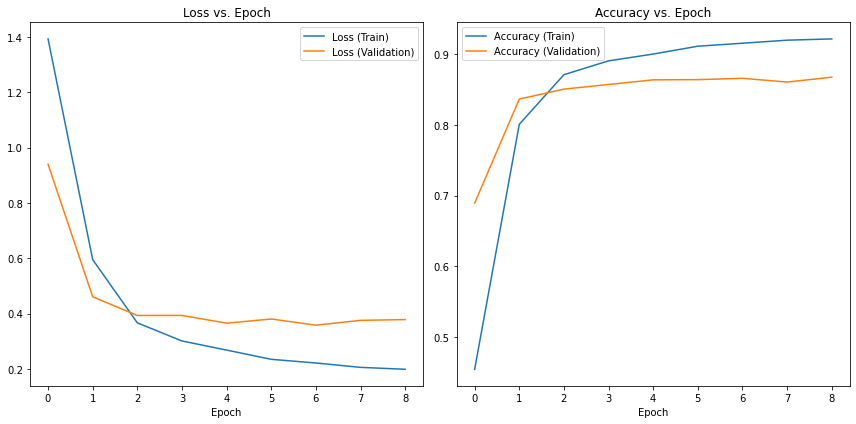

In [26]:

# Extract the data from the history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Loss (Train)')
plt.plot(val_loss, label='Loss (Validation)')
plt.legend()
plt.xlabel('Epoch')
plt.title('Loss vs. Epoch')

plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Accuracy (Train)')
plt.plot(val_accuracy, label='Accuracy (Validation)')
plt.legend()
plt.xlabel('Epoch')
plt.title('Accuracy vs. Epoch')

plt.tight_layout()
plt.show()


In [27]:
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)

100/100 [==============================] - 2s 13ms/step


In [28]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1055
           1       0.93      0.92      0.92       954
           2       0.84      0.80      0.82       438
           3       0.80      0.80      0.80       376
           4       0.80      0.79      0.80       268
           5       0.71      0.75      0.73       109

    accuracy                           0.87      3200
   macro avg       0.83      0.83      0.83      3200
weighted avg       0.87      0.87      0.87      3200



Text(0.5, 1.0, 'Confusion Matrix')

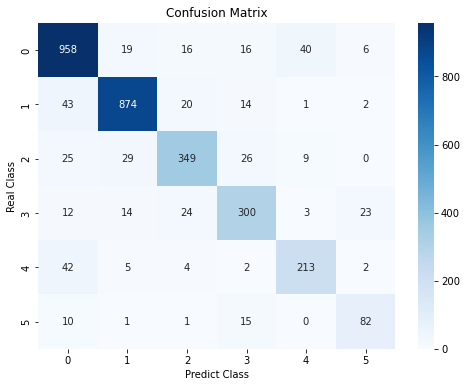

In [29]:
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predict Class')
plt.ylabel('Real Class')
plt.title('Confusion Matrix')